In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 
import plotly.graph_objects as go

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def plot_graph(graph):
    # Detect weights for edges and set them as labels
    has_weights = False
    if any(map(lambda edge: "weight" in graph.edges[edge], graph.edges)):
        for edge in graph.edges:
            edge_attrs = graph.edges[edge]
            weight = edge_attrs.get("weight", None)
            edge_attrs["label"] = weight
            has_weights = True
    
    # First, try graphviz backup as it produces cleaner plots
    # It requires both 'graphviz' and 'pygraphviz' installed.
    try:
        a = to_agraph(graph)
        a.layout('dot') 
        return display(Image(a.draw(format="png")))
    # Fallback to matplotlib backend if graphviz isn't accessible.
    except Exception:
        
        fig, ax = plt.subplots()
        pos=nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax)
        if has_weights:
            labels = nx.get_edge_attributes(graph,'weight')
            nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels, ax=ax)
        fig.tight_layout()
        plt.show()

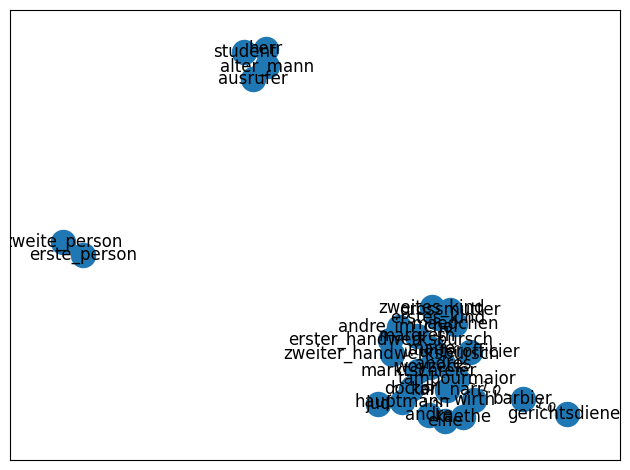

In [74]:
graph = nx.read_graphml('ger000564-buechner-woyzeck.graphml')
plot_graph(graph)

In [70]:
import networkx as nx
import plotly.graph_objects as go

# Load the GraphML file
graph = nx.read_graphml('ger000564-buechner-woyzeck.graphml')

# Compute the layout positions
pos = nx.spring_layout(graph)

degrees = dict(graph.degree)
num_words = nx.get_node_attributes(graph, 'Number of spoken words')

# Create an empty plotly figure
fig = go.Figure()

# Add nodes to the figure
for node in graph.nodes:
    x, y = pos[node]
    node_color = degrees[node]
    fig.add_trace(
        go.Scatter(
            x=[x],
            y=[y],
            text=node,
            mode='markers',
            marker=dict(size=10, color=node_color, colorscale='Viridis'),
            name=node
        )
    )

# Add edges to the figure
for edge in graph.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_weight = graph[edge[0]][edge[1]]['weight']  # Get the weight of the edge
    fig.add_trace(
        go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            mode='lines',
            line=dict(color='gray', width=edge_weight*0.7),  # Set the edge weight as the line width
            hoverinfo='text',
            text='WHATTHEFUCK',#[f'Weight: {edge_weight}'],  # Show the weight on the edge
            showlegend=False
        )
    )



# Set the layout of the graph
layout = go.Layout(title='Network Graph from Woyzeck',
                   width=800)

# Update the figure with the layout
fig.update_layout(layout)

# Show the graph
fig.show()


In [67]:
import networkx as nx
import plotly.graph_objects as go


# Load the GraphML file
graph = nx.read_graphml('ger000564-buechner-woyzeck.graphml')

# Compute the layout positions
pos = nx.spring_layout(graph, seed=69)

degrees = dict(graph.degree)
num_words = nx.get_node_attributes(graph, 'Number of spoken words')

# Create an empty plotly figure
fig = go.Figure()

# Add nodes to the figure
for node in graph.nodes:
    x, y = pos[node]
    node_color = degrees[node]
    fig.add_trace(
        go.Scattergl(
            x=[x],
            y=[y],
            text=node,
            mode='markers',
            marker=dict(size=10, color=node_color, colorscale='Viridis'),
            name=node
        )
    )

# Add edges to the figure
edge_segments = []
edge_weights = []
edge_annotations = []
for edge in graph.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_weight = graph[edge[0]][edge[1]]['weight']  # Get the weight of the edge
    
    # Break x-axis by creating two separate segments
    edge_segments.append([x0, x1, None])
    edge_segments.append([y0, y1, None])
    
    edge_weights.extend([edge_weight, None])
    
    edge_annotations.append(
        dict(
            x=(x0 + x1) / 2,
            y=(y0 + y1) / 2,
            text=f'{edge_weight}',
            showarrow=False,
            font=dict(color='black', size=10)
        )
    )
print(edge_segments)
for edge in edge_segments:
    fig.add_trace(
        go.Scattergl(
            x=edge_segments,
            y=edge_segments,
            mode='lines',
            line=dict(color='gray', width=10),  # Set the edge weight as the line width
            hoverinfo='none',
            showlegend=False
        )
    )

# Add edge annotations
fig.update_layout(annotations=edge_annotations)

# Set the layout of the graph
layout = go.Layout(
    title='Network Graph from Woyzeck',
    width=700,
    height=500
)

# Update the figure with the layout
fig.update_layout(layout)

# Show the graph
fig.show()


[[0.15029724013321463, 0.22040056902470803, None], [-0.08618790132168092, -0.030887581269534232, None], [0.15029724013321463, 0.22956339665664766, None], [-0.08618790132168092, -0.08842994407465703, None], [0.15029724013321463, 0.12789318427927174, None], [-0.08618790132168092, -0.1435527243152349, None], [0.22040056902470803, 0.22956339665664766, None], [-0.030887581269534232, -0.08842994407465703, None], [0.22040056902470803, 0.18297809026832773, None], [-0.030887581269534232, 0.003346573648932609, None], [0.22040056902470803, 0.183927125351887, None], [-0.030887581269534232, 0.05676111261358806, None], [0.22040056902470803, 0.2684711466122937, None], [-0.030887581269534232, -0.1561058637545509, None], [0.22040056902470803, 0.21558428158966236, None], [-0.030887581269534232, -0.18605341377764875, None], [0.22040056902470803, 0.2531353933135139, None], [-0.030887581269534232, -0.20571301754591548, None], [0.22040056902470803, 0.3041197875883031, None], [-0.030887581269534232, -0.18100

In [6]:
# Convert the graph into an adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).todense()
adj_df = pd.DataFrame(adj_matrix, index=graph.nodes(), columns=graph.nodes())
adj_df

,marktschreier,woyzeck,marie,tambourmajor,andres,karl_narr,barbier,maedchen,erstes_kind,zweites_kind,...,student,erster_handwerksbursch,zweiter_handwerksbursch,unterofficier,doctor,hauptmann,andre_im_chor,eine,andre,jud
marktschreier,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
woyzeck,1.0,0.0,10.0,2.0,10.0,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
marie,2.0,10.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
tambourmajor,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
andres,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
karl_narr,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
barbier,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
maedchen,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erstes_kind,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zweites_kind,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
degree_centrality = nx.degree_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)

cent_df = pd.DataFrame({'Degree': degree_centrality,
                   'Closeness': closeness_centrality,
                   'Betweenness': betweenness_centrality})

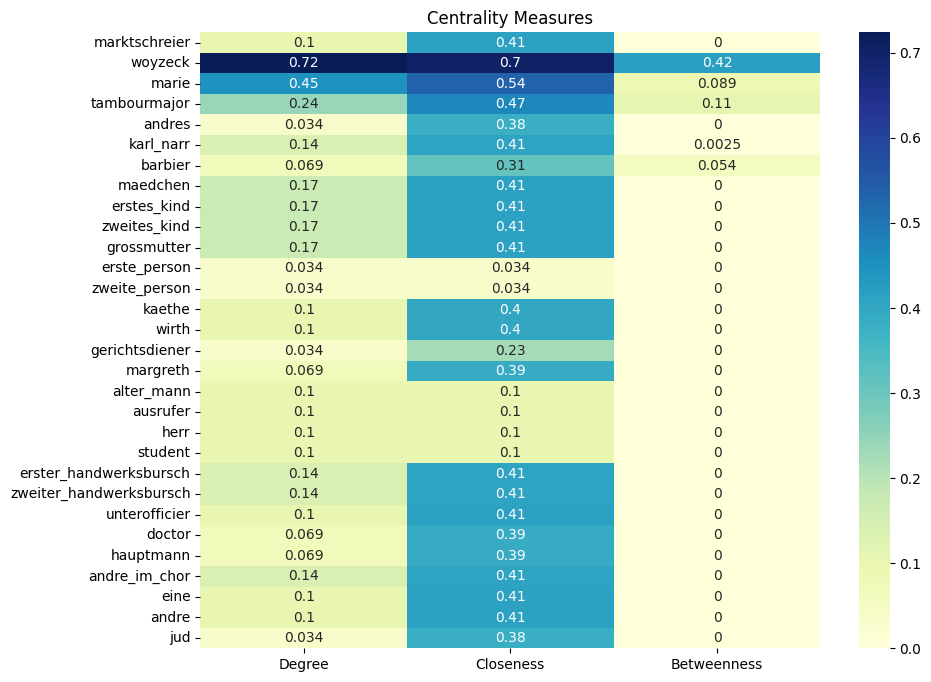

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(cent_df, annot=True , cmap="YlGnBu", annot_kws={'fontsize': 10})
plt.title("Centrality Measures")
plt.show()

In [9]:
att = nx.get_node_attributes(graph, 'Number of spoken words')

In [10]:
cent_df["spoken_words"] = att

In [11]:
cent_df

,Degree,Closeness,Betweenness,spoken_words
marktschreier,0.103448,0.414577,0.000000,270
woyzeck,0.724138,0.701592,0.417077,2553
marie,0.448276,0.536511,0.089491,1010
tambourmajor,0.241379,0.467728,0.111658,192
andres,0.034483,0.380029,0.000000,346
karl_narr,0.137931,0.405364,0.002463,80
barbier,0.068966,0.309176,0.054187,308
maedchen,0.172414,0.414577,0.000000,36
erstes_kind,0.172414,0.414577,0.000000,29
zweites_kind,0.172414,0.414577,0.000000,39


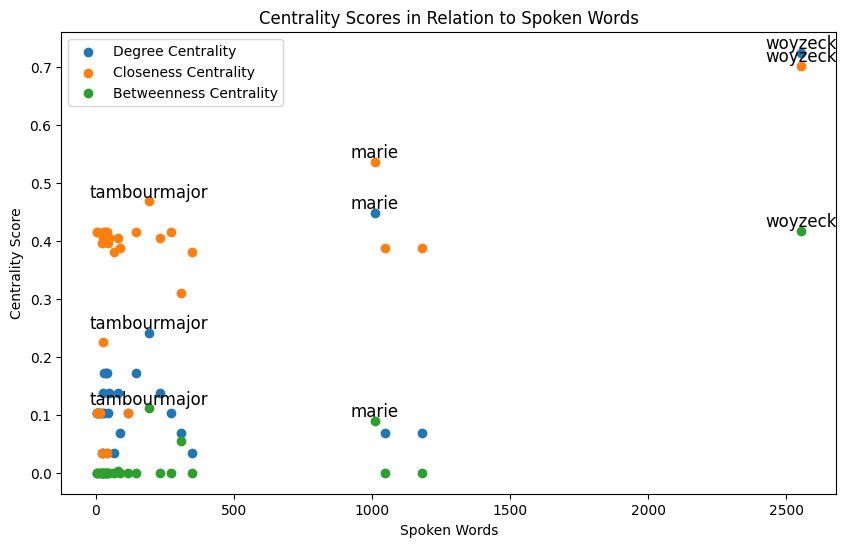

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(cent_df['spoken_words'], cent_df['Degree'], label='Degree Centrality')
plt.scatter(cent_df['spoken_words'], cent_df['Closeness'], label='Closeness Centrality')
plt.scatter(cent_df['spoken_words'], cent_df['Betweenness'], label='Betweenness Centrality')
plt.xlabel('Spoken Words')
plt.ylabel('Centrality Score')
plt.title('Centrality Scores in Relation to Spoken Words')
plt.legend()
# Annotate specific scatterplot dots with node names
annotated_nodes = ['woyzeck', 'marie', 'tambourmajor']  # Replace with the node names you want to annotate

for node in annotated_nodes:
    if node in cent_df.index:
        row = cent_df.loc[node]
        plt.text(row['spoken_words'], row['Degree'], node, ha='center', va='bottom', fontsize=12)
        plt.text(row['spoken_words'], row['Closeness'], node, ha='center', va='bottom', fontsize=12)
        plt.text(row['spoken_words'], row['Betweenness'], node, ha='center', va='bottom', fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

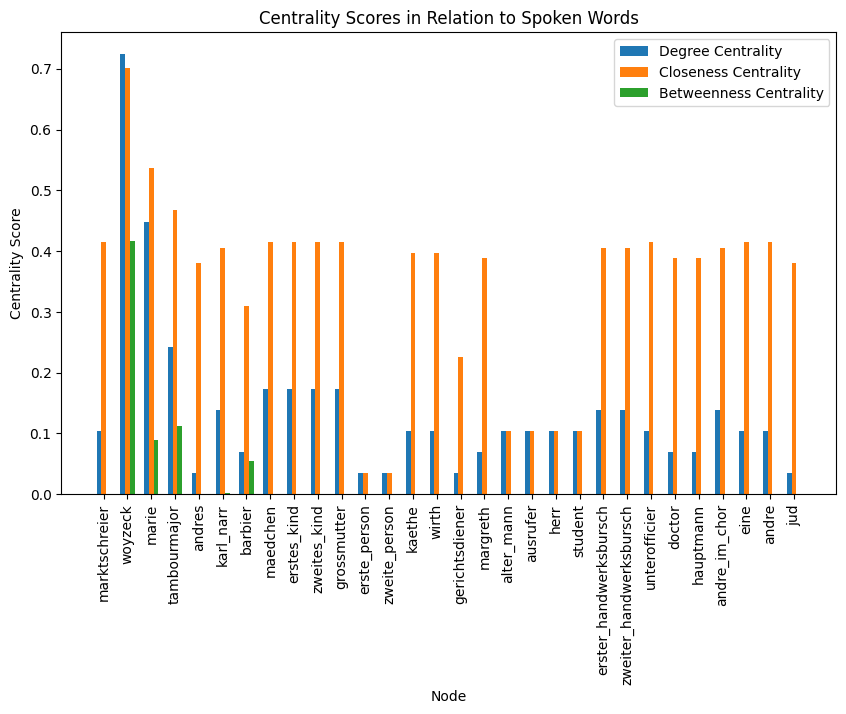

In [14]:
plt.figure(figsize=(10, 6))

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the positions of the bars on the x-axis
x = np.arange(len(cent_df))

# Set the width of each bar
width = 0.2

# Plot the centrality scores for each node
plt.bar(x - width, cent_df['Degree'], width=width, label='Degree Centrality')
plt.bar(x, cent_df['Closeness'], width=width, label='Closeness Centrality')
plt.bar(x + width, cent_df['Betweenness'], width=width, label='Betweenness Centrality')

# Set the x-axis tick positions and labels
plt.xticks(x, cent_df.index, rotation='vertical')

# Set the axis labels and the title
plt.xlabel('Node')
plt.ylabel('Centrality Score')
plt.title('Centrality Scores in Relation to Spoken Words')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [15]:
print(cent_df['Closeness'].nlargest(5))
print(cent_df['Betweenness'].nlargest(5))
print(cent_df['Degree'].nlargest(5))

woyzeck          0.701592
marie            0.536511
tambourmajor     0.467728
marktschreier    0.414577
maedchen         0.414577
Name: Closeness, dtype: float64
woyzeck         0.417077
tambourmajor    0.111658
marie           0.089491
barbier         0.054187
karl_narr       0.002463
Name: Betweenness, dtype: float64
woyzeck         0.724138
marie           0.448276
tambourmajor    0.241379
maedchen        0.172414
erstes_kind     0.172414
Name: Degree, dtype: float64
